In [2]:
from APES import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
import pylab as pl
from IPython import display
import skvideo.io
# Set the dimension for each block ( affect the generated image quality)
Settings.SetBlockSize(100)

# Simple Example

In [4]:
?CreateEnvironment

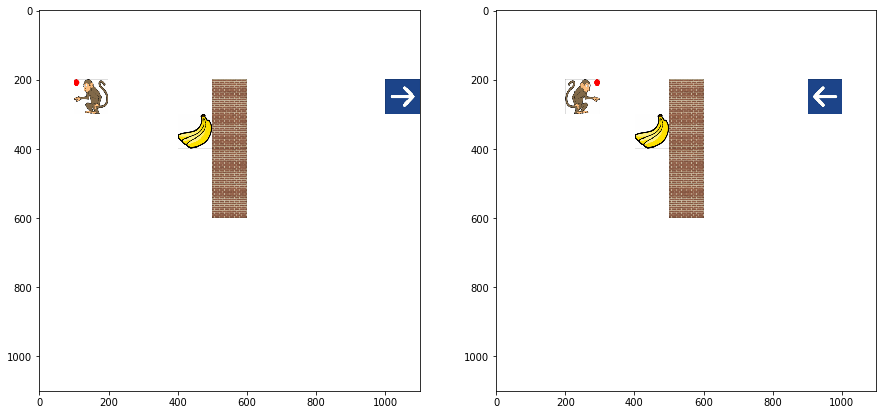

In [5]:
perf = {'sub':(2,1),'dom':(2,10),'food':(3,4),'obs':(3,5),'subdir':'W','domdir':'E','mesg':'example'}
game = CreateEnvironment(perf)

agents = [game.agents[i] for i in game.agents]

game.Step()
env_initial = game.BuildImage()

#Execute every time step
agents[0].NextAction = Settings.PossibleActions[2]
agents[1].NextAction = Settings.PossibleActions[3]

game.Step()
env_1step = game.BuildImage()

fig,ax = plt.subplots(nrows=1,ncols=2)
ax[0].imshow(env_initial)
ax[1].imshow(env_1step)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

# Complex Example.
Launching the below cell will generate a video file "output.mp4" contains the episode. The video has three perspectives next to each other in every frame:
 1. The fully observed environment.
 2. The environment as seen from the red agent point of view
 3. The environment as seen from the blue agent point of view

In [6]:
Settings.BlockSize

(100, 100)

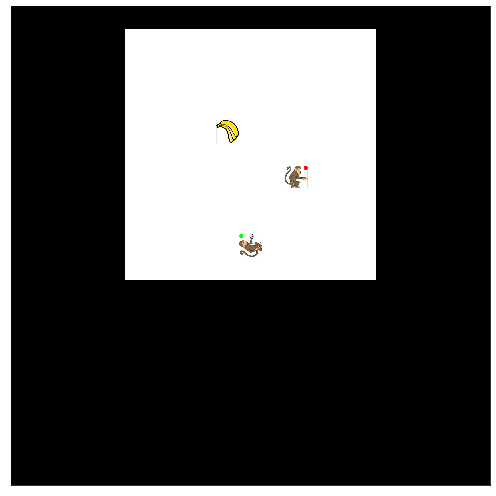

In [9]:
#Add pictures for items
Settings.AddImage('Wall','APES/Pics/wall.jpg')
#Settings.AddImage('Food','APES/Pics/food.jpg')
Settings.AddImage('Food','APES/Pics/food.jpg')

#Create Probability distribution matrices (PDMs)
obs_pdm = np.zeros(Settings.WorldSize)
bagnts_pdm = np.zeros(Settings.WorldSize)
ragnts_pdm = np.zeros(Settings.WorldSize)
food_pdm = np.zeros(Settings.WorldSize)

# Obstacles can appear from 3rd to 7th row and 5th column
obs_pdm[3:8,5] = 1 
bagnts_pdm[5,0] = 1
ragnts_pdm[7,4] = 1
food_pdm[4,6] = 1

#Add PDMs to Settings
Settings.AddProbabilityDistribution('Obs_pdm',obs_pdm) 
Settings.AddProbabilityDistribution('ragnts_pdm',ragnts_pdm)
Settings.AddProbabilityDistribution('bagnts_pdm',bagnts_pdm)
Settings.AddProbabilityDistribution('food_pdm',food_pdm)

#Create World Elements
#Create vertical obastacle with length 4
obshape = np.ones((4,1))
obs = Obstacles('Wall',Shape=obshape,PdstName='Obs_pdm')

#Create two agents
#ragnt = Agent(Fname='APES/Pics/red.jpg',PdstName='ragnts_pdm')
ragnt = Agent(Fname='APES/Pics/red.jpg',PdstName='ragnts_pdm')
bagnt = Agent(Fname='APES/Pics/green.jpg',VisionAngle=360 ,PdstName='bagnts_pdm',EgoCentric=True)
food = Foods('Food',PdstName='food_pdm')

#Reward food by 10, time step by -0.1
game = World(RewardsScheme=[0,10,-0.1])

#Adding Agents in Order of Following the action
game.AddAgents([ragnt,bagnt])
#game.AddObstacles([obs])
game.AddFoods([food])

#Execute at the beginning of every episode
game.GenerateWorld()
ragnt.Direction='S'
bagnt.Direction='E'
bagnt.NextAction=Settings.PossibleActions[3]
#bagnt.NextAction = Settings.PossibleActions[0]
game.Step()

fig,ax = plt.subplots(nrows=1,ncols=1)
#plt.figure(figsize=(7,3))
ax.imshow(game.AgentViewPoint(bagnt.ID))#env_initial/255)
#ax[1].imshow(game.BuildImage())
ax.set_xticks([])
ax.set_yticks([])
fig.set_figheight(7)
fig.set_figwidth(7)
plt.tight_layout()
plt.savefig('ego_1.png',dpi=300)
#plt.savefig('allo_1.png',dpi=300)

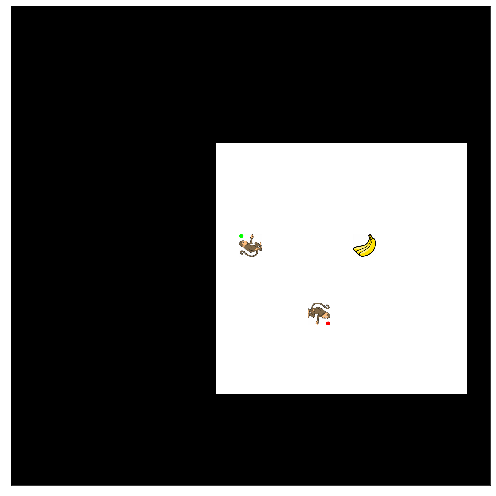

In [10]:
bagnt.NextAction=Settings.PossibleActions[0]
#bagnt.NextAction = Settings.PossibleActions[0]
game.Step()

fig,ax = plt.subplots(nrows=1,ncols=1)
#plt.figure(figsize=(7,3))
ax.imshow(game.AgentViewPoint(bagnt.ID))#env_initial/255)
#ax[1].imshow(game.BuildImage())
ax.set_xticks([])
ax.set_yticks([])
fig.set_figheight(7)
fig.set_figwidth(7)
plt.tight_layout()
plt.savefig('ego_2.png',dpi=300)
#plt.savefig('allo_2.png',dpi=300)

In [11]:
Settings.BlockSize

(100, 100)

In [14]:
Settings.PossibleActions[3]

[['L', 'E'], ['M', 'E']]

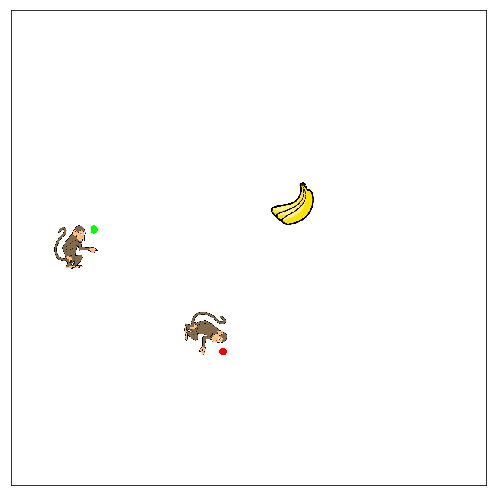

In [15]:
fig,ax = plt.subplots(nrows=1,ncols=1)
ax.imshow(game.BuildImage())#env_initial/255)
#ax[1].imshow(game.BuildImage())
#ax.set_axis_off()
ax.set_xticks([])
ax.set_yticks([])
fig.set_figheight(7)
fig.set_figwidth(7)
plt.tight_layout()
plt.savefig('full.png',dpi=300)

In [16]:
game.agents[1006].NextAction=Settings.PossibleActions[0]
game.Step()

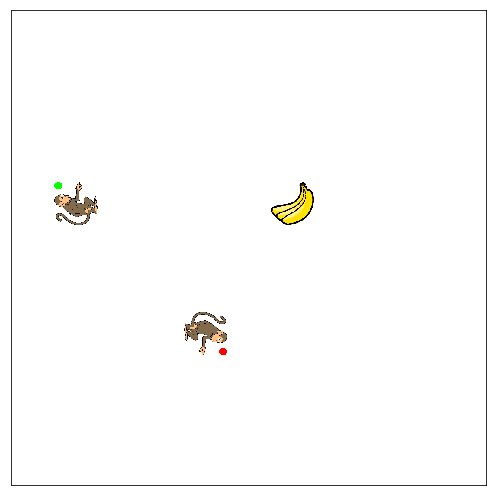

In [17]:
fig,ax = plt.subplots(nrows=1,ncols=1)
ax.imshow(game.BuildImage())#env_initial/255)
#ax[1].imshow(game.BuildImage())
#ax.set_axis_off()
ax.set_xticks([])
ax.set_yticks([])
fig.set_figheight(7)
fig.set_figwidth(7)
plt.tight_layout()
plt.savefig('full_moveup.png',dpi=300)

# Eat food case

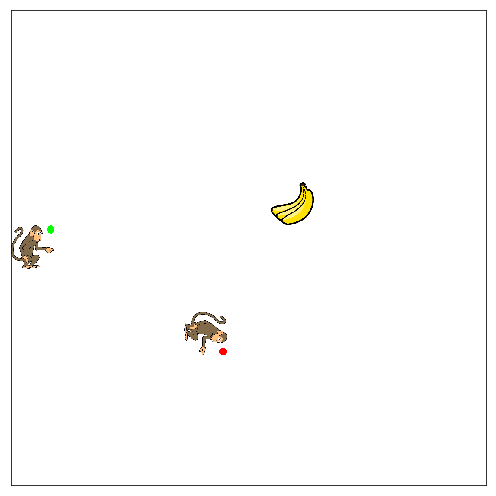

In [7]:
#Add pictures for items
Settings.AddImage('Wall','APES/Pics/wall.jpg')
Settings.AddImage('Food','banana2.jpg')

#Create Probability distribution matrices (PDMs)
obs_pdm = np.zeros(Settings.WorldSize)
bagnts_pdm = np.zeros(Settings.WorldSize)
ragnts_pdm = np.zeros(Settings.WorldSize)
food_pdm = np.zeros(Settings.WorldSize)

# Obstacles can appear from 3rd to 7th row and 5th column
obs_pdm[3:8,5] = 1 
bagnts_pdm[5,0] = 1
ragnts_pdm[7,4] = 1
food_pdm[4,6] = 1

#Add PDMs to Settings
Settings.AddProbabilityDistribution('Obs_pdm',obs_pdm) 
Settings.AddProbabilityDistribution('ragnts_pdm',ragnts_pdm)
Settings.AddProbabilityDistribution('bagnts_pdm',bagnts_pdm)
Settings.AddProbabilityDistribution('food_pdm',food_pdm)

#Create World Elements
#Create vertical obastacle with length 4
obshape = np.ones((4,1))
obs = Obstacles('Wall',Shape=obshape,PdstName='Obs_pdm')

#Create two agents
#ragnt = Agent(Fname='APES/Pics/red.jpg',PdstName='ragnts_pdm')
ragnt = Agent(Fname='red.jpg',PdstName='ragnts_pdm')
bagnt = Agent(Fname='green.jpg',VisionAngle=180 ,PdstName='bagnts_pdm')#,EgoCentric=True)
food = Foods('Food',PdstName='food_pdm')

#Reward food by 10, time step by -0.1
game = World(RewardsScheme=[0,10,-0.1])

#Adding Agents in Order of Following the action
game.AddAgents([ragnt,bagnt])
#game.AddObstacles([obs])
game.AddFoods([food])

#Execute at the beginning of every episode
game.GenerateWorld()
ragnt.Direction='S'
bagnt.Direction='E'
game.Step()


fig,ax = plt.subplots(nrows=1,ncols=1)
ax.imshow(game.AgentViewPoint(bagnt.ID))#env_initial/255)
#ax[1].imshow(game.BuildImage())
ax.set_xticks([])
ax.set_yticks([])
fig.set_figheight(7)
fig.set_figwidth(7)
plt.tight_layout()

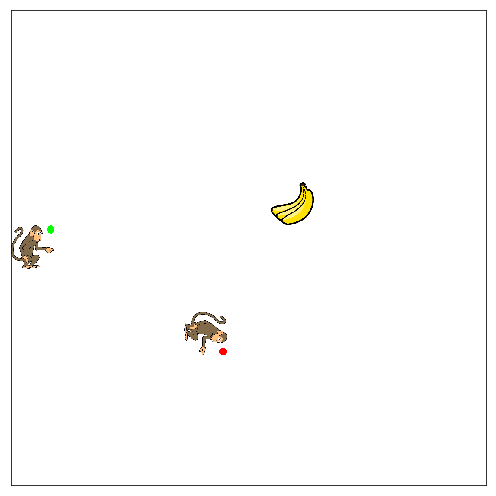

In [8]:
#ragnt.Direction='W'
game.Step()
fig,ax = plt.subplots(nrows=1,ncols=1)
ax.imshow(game.BuildImage())#env_initial/255)
#ax[1].imshow(game.BuildImage())
#ax.set_axis_off()
ax.set_xticks([])
ax.set_yticks([])
fig.set_figheight(7)
fig.set_figwidth(7)
plt.tight_layout()
plt.savefig('eat.png',dpi=300)

# Avoid food case

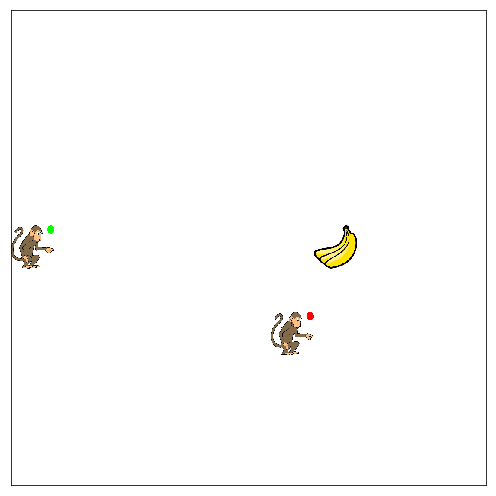

In [9]:
#Add pictures for items
Settings.AddImage('Wall','APES/Pics/wall.jpg')
Settings.AddImage('Food','banana2.jpg')

#Create Probability distribution matrices (PDMs)
obs_pdm = np.zeros(Settings.WorldSize)
bagnts_pdm = np.zeros(Settings.WorldSize)
ragnts_pdm = np.zeros(Settings.WorldSize)
food_pdm = np.zeros(Settings.WorldSize)

# Obstacles can appear from 3rd to 7th row and 5th column
obs_pdm[3:8,5] = 1 
bagnts_pdm[5,0] = 1
ragnts_pdm[7,6] = 1
food_pdm[5,7] = 1

#Add PDMs to Settings
Settings.AddProbabilityDistribution('Obs_pdm',obs_pdm) 
Settings.AddProbabilityDistribution('ragnts_pdm',ragnts_pdm)
Settings.AddProbabilityDistribution('bagnts_pdm',bagnts_pdm)
Settings.AddProbabilityDistribution('food_pdm',food_pdm)

#Create World Elements
#Create vertical obastacle with length 4
obshape = np.ones((4,1))
obs = Obstacles('Wall',Shape=obshape,PdstName='Obs_pdm')

#Create two agents
#ragnt = Agent(Fname='APES/Pics/red.jpg',PdstName='ragnts_pdm')
ragnt = Agent(Fname='red.jpg',PdstName='ragnts_pdm')
bagnt = Agent(Fname='green.jpg',VisionAngle=180 ,PdstName='bagnts_pdm')
food = Foods('Food',PdstName='food_pdm')

#Reward food by 10, time step by -0.1
game = World(RewardsScheme=[0,10,-0.1])

#Adding Agents in Order of Following the action
game.AddAgents([ragnt,bagnt])
#game.AddObstacles([obs])
game.AddFoods([food])

#Execute at the beginning of every episode
game.GenerateWorld()
ragnt.Direction='E'
bagnt.Direction='E'
#bagnt.NextAction=Settings.PossibleActions[3]
game.Step()


fig,ax = plt.subplots(nrows=1,ncols=1)
ax.imshow(game.AgentViewPoint(bagnt.ID))#env_initial/255)
#ax[1].imshow(game.BuildImage())
ax.set_xticks([])
ax.set_yticks([])
fig.set_figheight(7)
fig.set_figwidth(7)
plt.tight_layout()
#plt.savefig('ego.png')
#plt.savefig('alter.png')

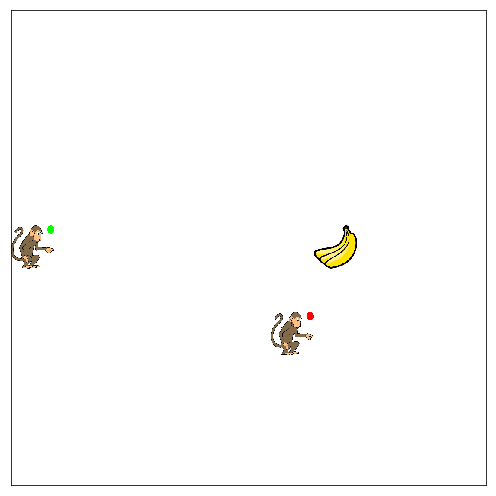

In [10]:
#ragnt.Direction='E'
fig,ax = plt.subplots(nrows=1,ncols=1)
ax.imshow(game.BuildImage())#env_initial/255)
#ax[1].imshow(game.BuildImage())
#ax.set_axis_off()
ax.set_xticks([])
ax.set_yticks([])
fig.set_figheight(7)
fig.set_figwidth(7)
plt.tight_layout()
plt.savefig('avoid.png',dpi=300)

In [12]:
import pandas as pd

In [13]:
x = pd.read_csv('output/1202/exp_details.csv',header=None)

In [14]:
x.sort_values(1).head(100)

,0,1,2,3,4,5,6,7,8
430,431,4,999.6,0.151006,0,Test,0,0,0
605,606,4,999.6,0.170745,0,Test,0,0,0
299,300,4,999.6,0.141128,0,Test,0,0,0
492,493,4,999.6,0.161648,0,Test,0,0,0
359,360,4,999.6,0.160843,0,Test,0,0,0
855,856,4,999.6,0.144613,0,Test,0,0,0
860,861,4,999.6,0.168870,0,Test,0,0,0
201,202,4,999.6,0.142420,0,Test,0,0,0
980,981,5,999.5,0.167741,0,Test,0,0,0
264,265,5,999.5,0.185265,0,Test,0,0,0


### Video number 6

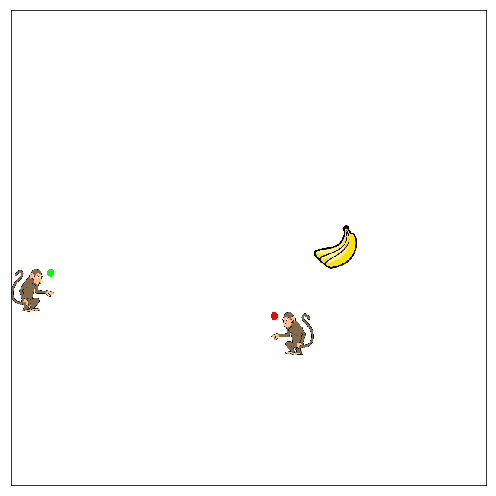

In [4]:
#Add pictures for items
Settings.AddImage('Wall','APES/Pics/wall.jpg')
Settings.AddImage('Food','banana2.jpg')

#Create Probability distribution matrices (PDMs)
obs_pdm = np.zeros(Settings.WorldSize)
bagnts_pdm = np.zeros(Settings.WorldSize)
ragnts_pdm = np.zeros(Settings.WorldSize)
food_pdm = np.zeros(Settings.WorldSize)

# Obstacles can appear from 3rd to 7th row and 5th column
obs_pdm[3:8,5] = 1 
bagnts_pdm[6,0] = 1
ragnts_pdm[7,6] = 1
food_pdm[5,7] = 1

#Add PDMs to Settings
Settings.AddProbabilityDistribution('Obs_pdm',obs_pdm) 
Settings.AddProbabilityDistribution('ragnts_pdm',ragnts_pdm)
Settings.AddProbabilityDistribution('bagnts_pdm',bagnts_pdm)
Settings.AddProbabilityDistribution('food_pdm',food_pdm)

#Create World Elements
#Create vertical obastacle with length 4
obshape = np.ones((4,1))
obs = Obstacles('Wall',Shape=obshape,PdstName='Obs_pdm')

#Create two agents
#ragnt = Agent(Fname='APES/Pics/red.jpg',PdstName='ragnts_pdm')
ragnt = Agent(Fname='red.jpg',PdstName='ragnts_pdm')
bagnt = Agent(Fname='green.jpg',VisionAngle=180 ,PdstName='bagnts_pdm')#,EgoCentric=True)
food = Foods('Food',PdstName='food_pdm')

#Reward food by 10, time step by -0.1
game = World(RewardsScheme=[0,10,-0.1])

#Adding Agents in Order of Following the action
game.AddAgents([ragnt,bagnt])
#game.AddObstacles([obs])
game.AddFoods([food])

#Execute at the beginning of every episode
game.GenerateWorld()
ragnt.Direction='W'
bagnt.Direction='E'
game.Step()


fig,ax = plt.subplots(nrows=1,ncols=1)
ax.imshow(game.AgentViewPoint(bagnt.ID))#env_initial/255)
#ax[1].imshow(game.BuildImage())
ax.set_xticks([])
ax.set_yticks([])
fig.set_figheight(7)
fig.set_figwidth(7)
plt.tight_layout()
plt.savefig('not_eat.png',dpi=300)

### Video number 35

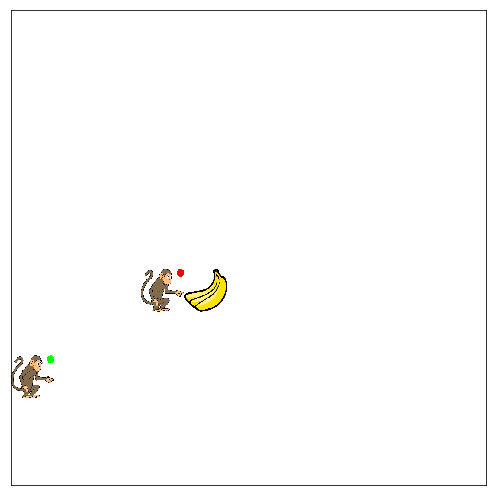

In [7]:
#Add pictures for items
Settings.AddImage('Wall','APES/Pics/wall.jpg')
Settings.AddImage('Food','banana2.jpg')

#Create Probability distribution matrices (PDMs)
obs_pdm = np.zeros(Settings.WorldSize)
bagnts_pdm = np.zeros(Settings.WorldSize)
ragnts_pdm = np.zeros(Settings.WorldSize)
food_pdm = np.zeros(Settings.WorldSize)

# Obstacles can appear from 3rd to 7th row and 5th column
obs_pdm[3:8,5] = 1 
bagnts_pdm[8,0] = 1
ragnts_pdm[6,3] = 1
food_pdm[6,4] = 1

#Add PDMs to Settings
Settings.AddProbabilityDistribution('Obs_pdm',obs_pdm) 
Settings.AddProbabilityDistribution('ragnts_pdm',ragnts_pdm)
Settings.AddProbabilityDistribution('bagnts_pdm',bagnts_pdm)
Settings.AddProbabilityDistribution('food_pdm',food_pdm)

#Create World Elements
#Create vertical obastacle with length 4
obshape = np.ones((4,1))
obs = Obstacles('Wall',Shape=obshape,PdstName='Obs_pdm')

#Create two agents
#ragnt = Agent(Fname='APES/Pics/red.jpg',PdstName='ragnts_pdm')
ragnt = Agent(Fname='red.jpg',PdstName='ragnts_pdm')
bagnt = Agent(Fname='green.jpg',VisionAngle=180 ,PdstName='bagnts_pdm')#,EgoCentric=True)
food = Foods('Food',PdstName='food_pdm')

#Reward food by 10, time step by -0.1
game = World(RewardsScheme=[0,10,-0.1])

#Adding Agents in Order of Following the action
game.AddAgents([ragnt,bagnt])
#game.AddObstacles([obs])
game.AddFoods([food])

#Execute at the beginning of every episode
game.GenerateWorld()
ragnt.Direction='E'
bagnt.Direction='E'
game.Step()


fig,ax = plt.subplots(nrows=1,ncols=1)
ax.imshow(game.AgentViewPoint(bagnt.ID))#env_initial/255)
#ax[1].imshow(game.BuildImage())
ax.set_xticks([])
ax.set_yticks([])
fig.set_figheight(7)
fig.set_figwidth(7)
plt.tight_layout()
plt.savefig('not_avoid.png',dpi=300)